In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Set up Data

In [ ]:
mix = pd.read_csv("/home/techfield/Downloads/gmm (1).csv",sep = ",", header = None) 

In [41]:
mix = mix.as_matrix()

/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [42]:
mix = mix.astype(float)
type(mix[0][0])

numpy.float64

# Gausian Mixture Model

In [58]:
class GMM:
    
    def __init__(self,X,K,beta):
        self.X=X
        self.K=K
        self.beta = beta
        self.N, self.D = X.shape
        self.m = X[np.random.choice(X.shape[0], K, replace=False), :]
        
    def distance2(self):
        self.d2 = np.sum((self.X - self.m.reshape([self.K,1,self.D]))**2,axis = 2)
        
    def responsibility(self):
        ed2 = np.exp(-self.beta*self.d2)
        self.r = ed2 / np.sum(ed2, axis = 0)
    
    def mean(self):
        return (self.r @ self.X)/np.sum(self.r, axis = 1, keepdims = True)
    
    def distortion(self):
        return (self.r * self.d2).sum()
    
    def fit(self, epochs, thresh):
        
        self.J = []
        for epoch in range(epochs):
            self.distance2()
            self.responsibility()
            m = self.mean()
            dist = np.sqrt(np.sum( (self.m - m)**2, axis = 1))
            
            if np.all(dist<thresh): break
            self.m =  m
            
            self.J.append(self.distortion())


# Run model

In [218]:
gmm = GMM(mix,3,1)
gmm.fit(4,.01)

gmm.m[0,:]

array([-0.2124732 , -0.95666711])

In [219]:
gmm.m

array([[-0.2124732 , -0.95666711],
       [ 4.02839706,  3.69360283],
       [-0.04301043,  3.20011743]])

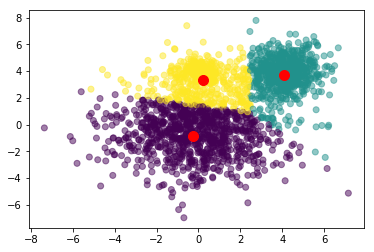

In [71]:
plt.figure()
plt.scatter(mix[:,0],mix[:,1],alpha=.5, c = gmm.r.argmax(axis=0))
plt.scatter(gmm.m[:,0],gmm.m[:,1], s=100,c="r")